KeyError: 'A_day'

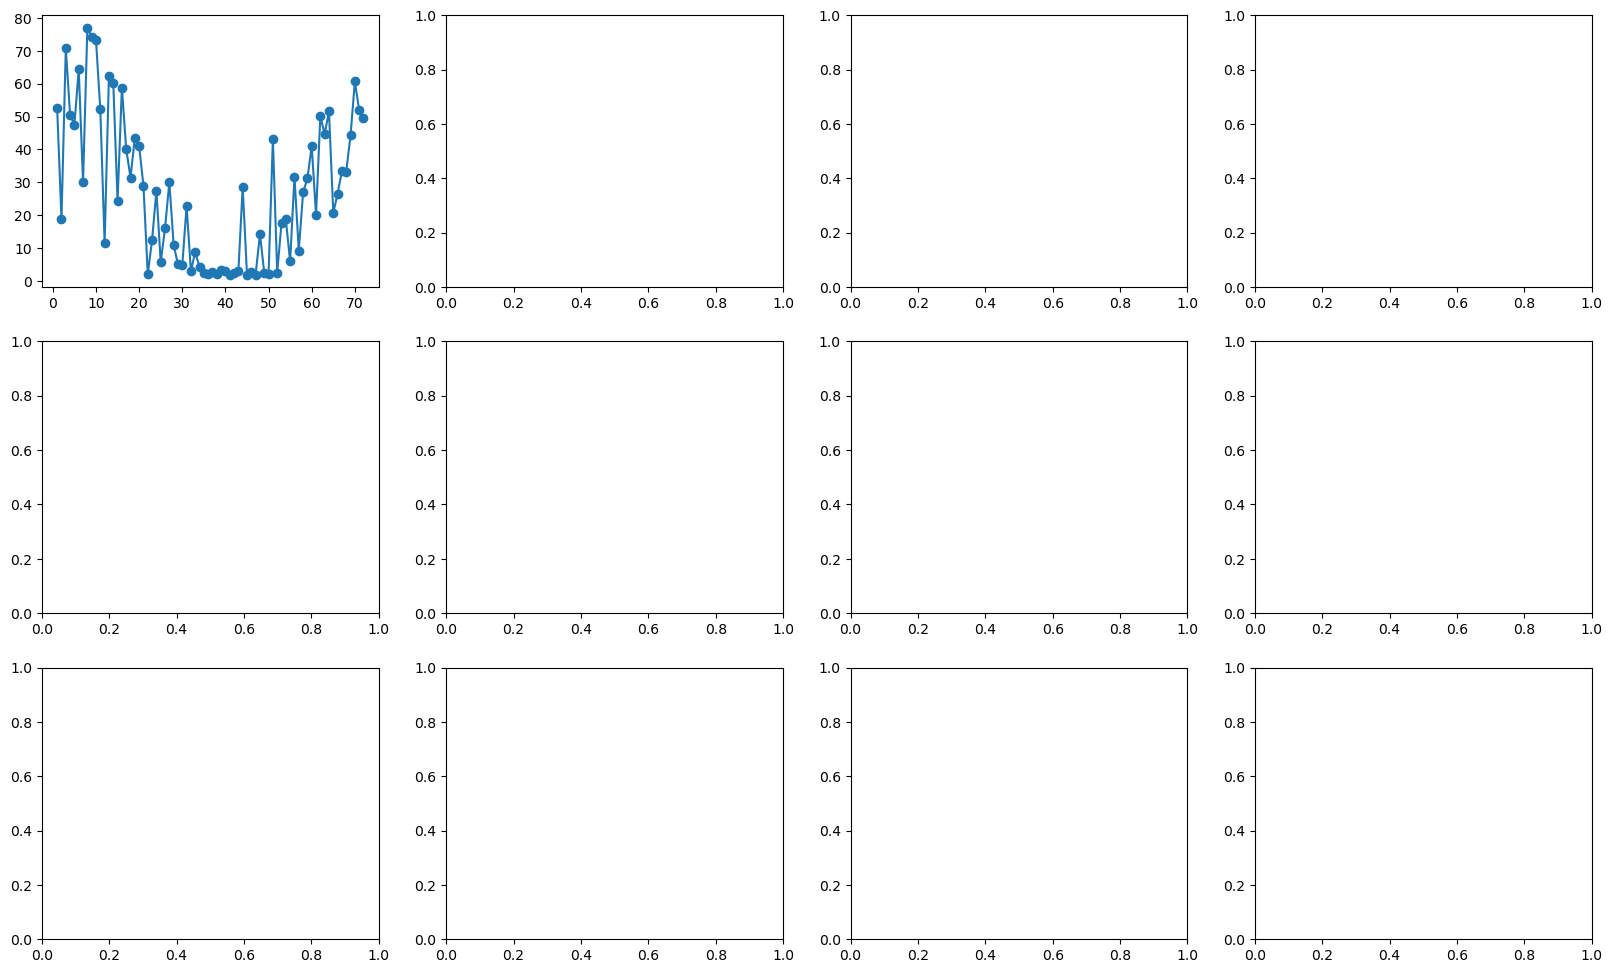

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/areaDematada3_precipitacao.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 1991
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 1991)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 1992):
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Verificar se existem dados faltantes na precipitação
    if year_data["Precipitação"].isnull().any():
        print(f"Ano {year} contém dados faltantes na precipitação.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Verificar se a coluna 'A_day' foi criada corretamente
    if 'A_day' not in year_data.columns:
        print(f"A coluna 'A_day' não foi criada corretamente para o ano {year}.")
        continue

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        inicio_seca = year_data[year_data["A_day"] == year_data["A_day"].min()]["Pentada"].values[0]
        fim_seca = year_data[year_data["A_day"] == year_data["A_day"].max()]["Pentada"].values[0]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(range(1981, 1992)):
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o')

    # Plotar A(day)
    ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")

    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="blue", linestyle="--", label="Início da seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação e A(day) - {year}")
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)


KeyError: 'A_day'

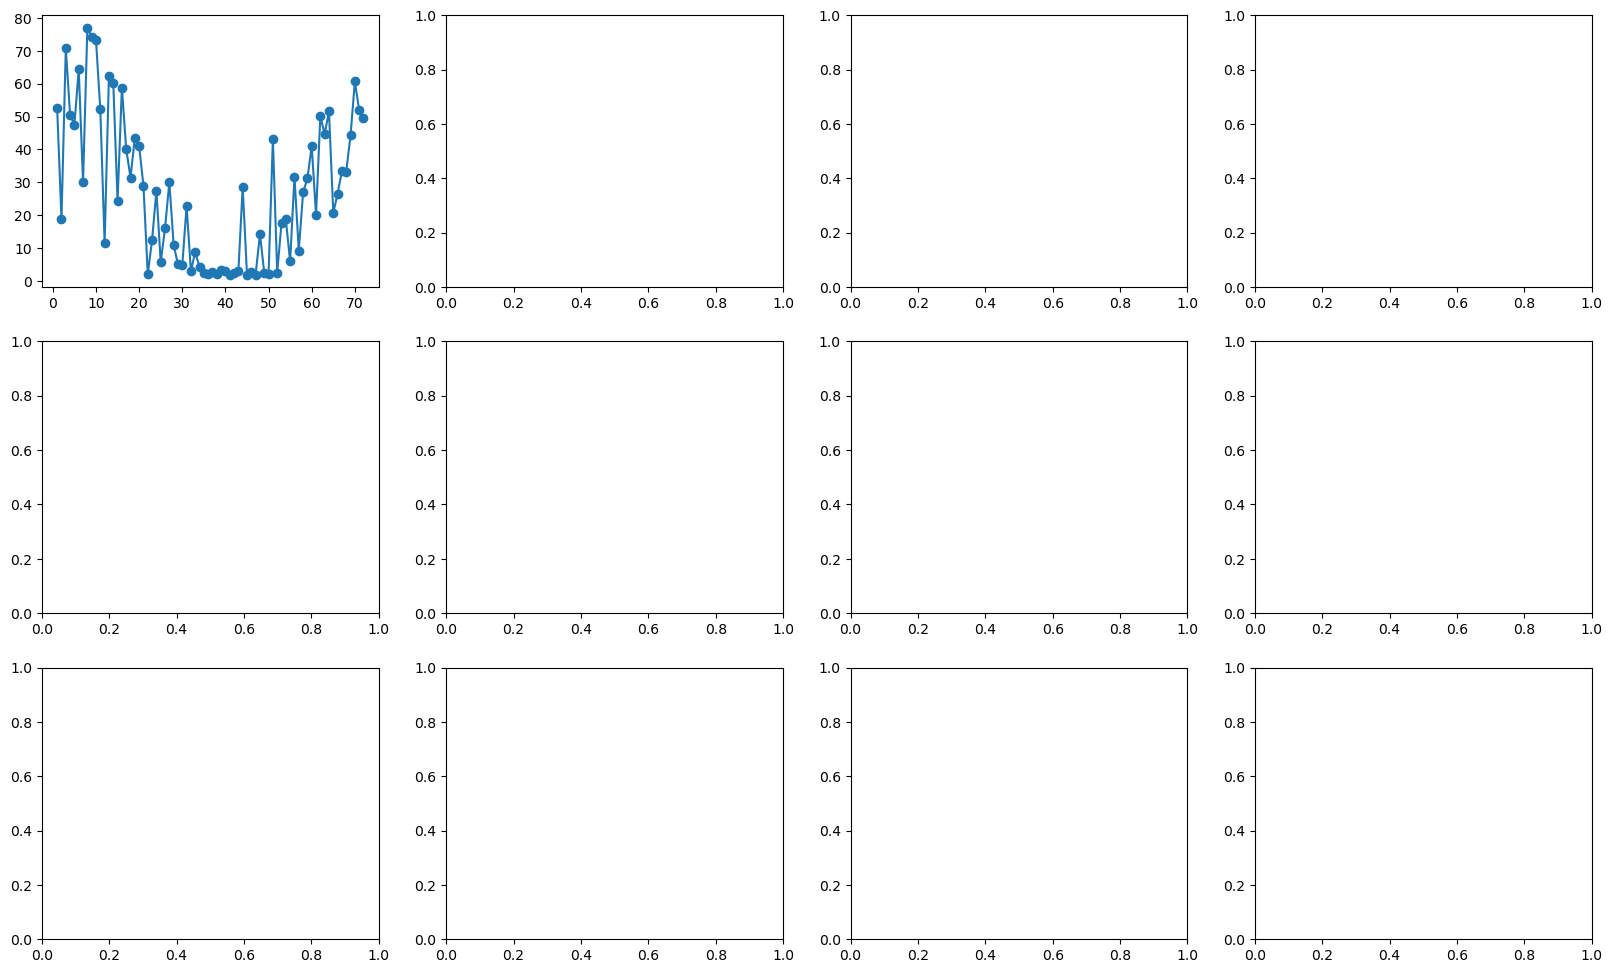

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/areaDematada3_precipitacao.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 1991
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 1991)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 1992):
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        inicio_seca = year_data[year_data["A_day"] == year_data["A_day"].min()]["Pentada"].values[0]
        fim_seca = year_data[year_data["A_day"] == year_data["A_day"].max()]["Pentada"].values[0]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(range(1981, 1992)):
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o')

    # Plotar A(day)
    ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")

    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="blue", linestyle="--", label="Início da seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação e A(day) - {year}")
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)


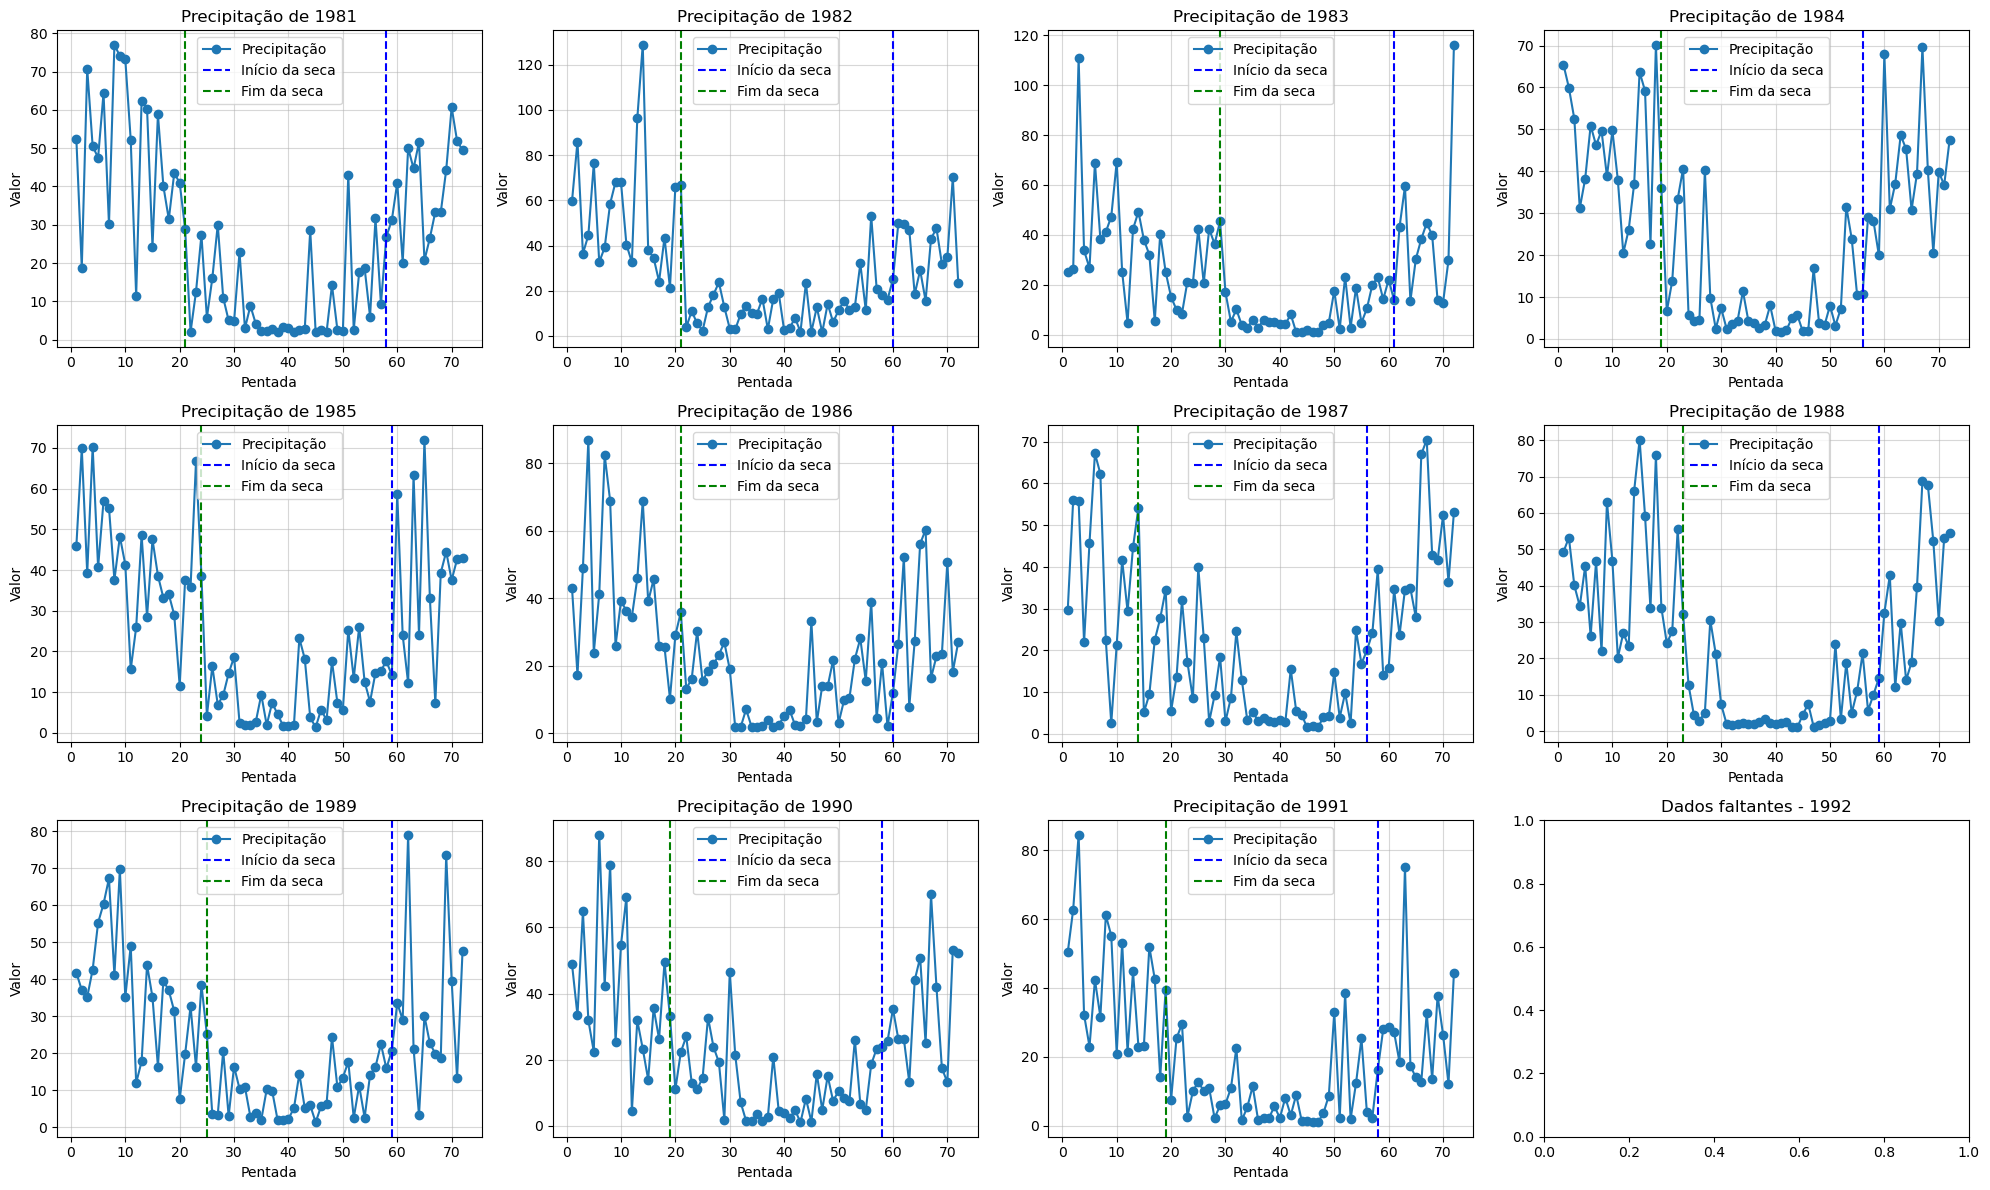

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   58                21           -37
1   1982                   60                21           -39
2   1983                   61                29           -32
3   1984                   56                19           -37
4   1985                   59                24           -35
5   1986                   60                21           -39
6   1987                   56                14           -42
7   1988                   59                23           -36
8   1989                   59                25           -34
9   1990                   58                19           -39
10  1991                   58                19           -39


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/areaDematada3_precipitacao.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 1991
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 1991)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 1992):
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        inicio_seca = year_data[year_data["A_day"] == year_data["A_day"].min()]["Pentada"].values[0]
        fim_seca = year_data[year_data["A_day"] == year_data["A_day"].max()]["Pentada"].values[0]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(range(1981, 1993)):
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o')

    # Verificar se a coluna A_day existe
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"Dados faltantes para A(day) - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="blue", linestyle="--", label="Início da seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação de {year}")
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)


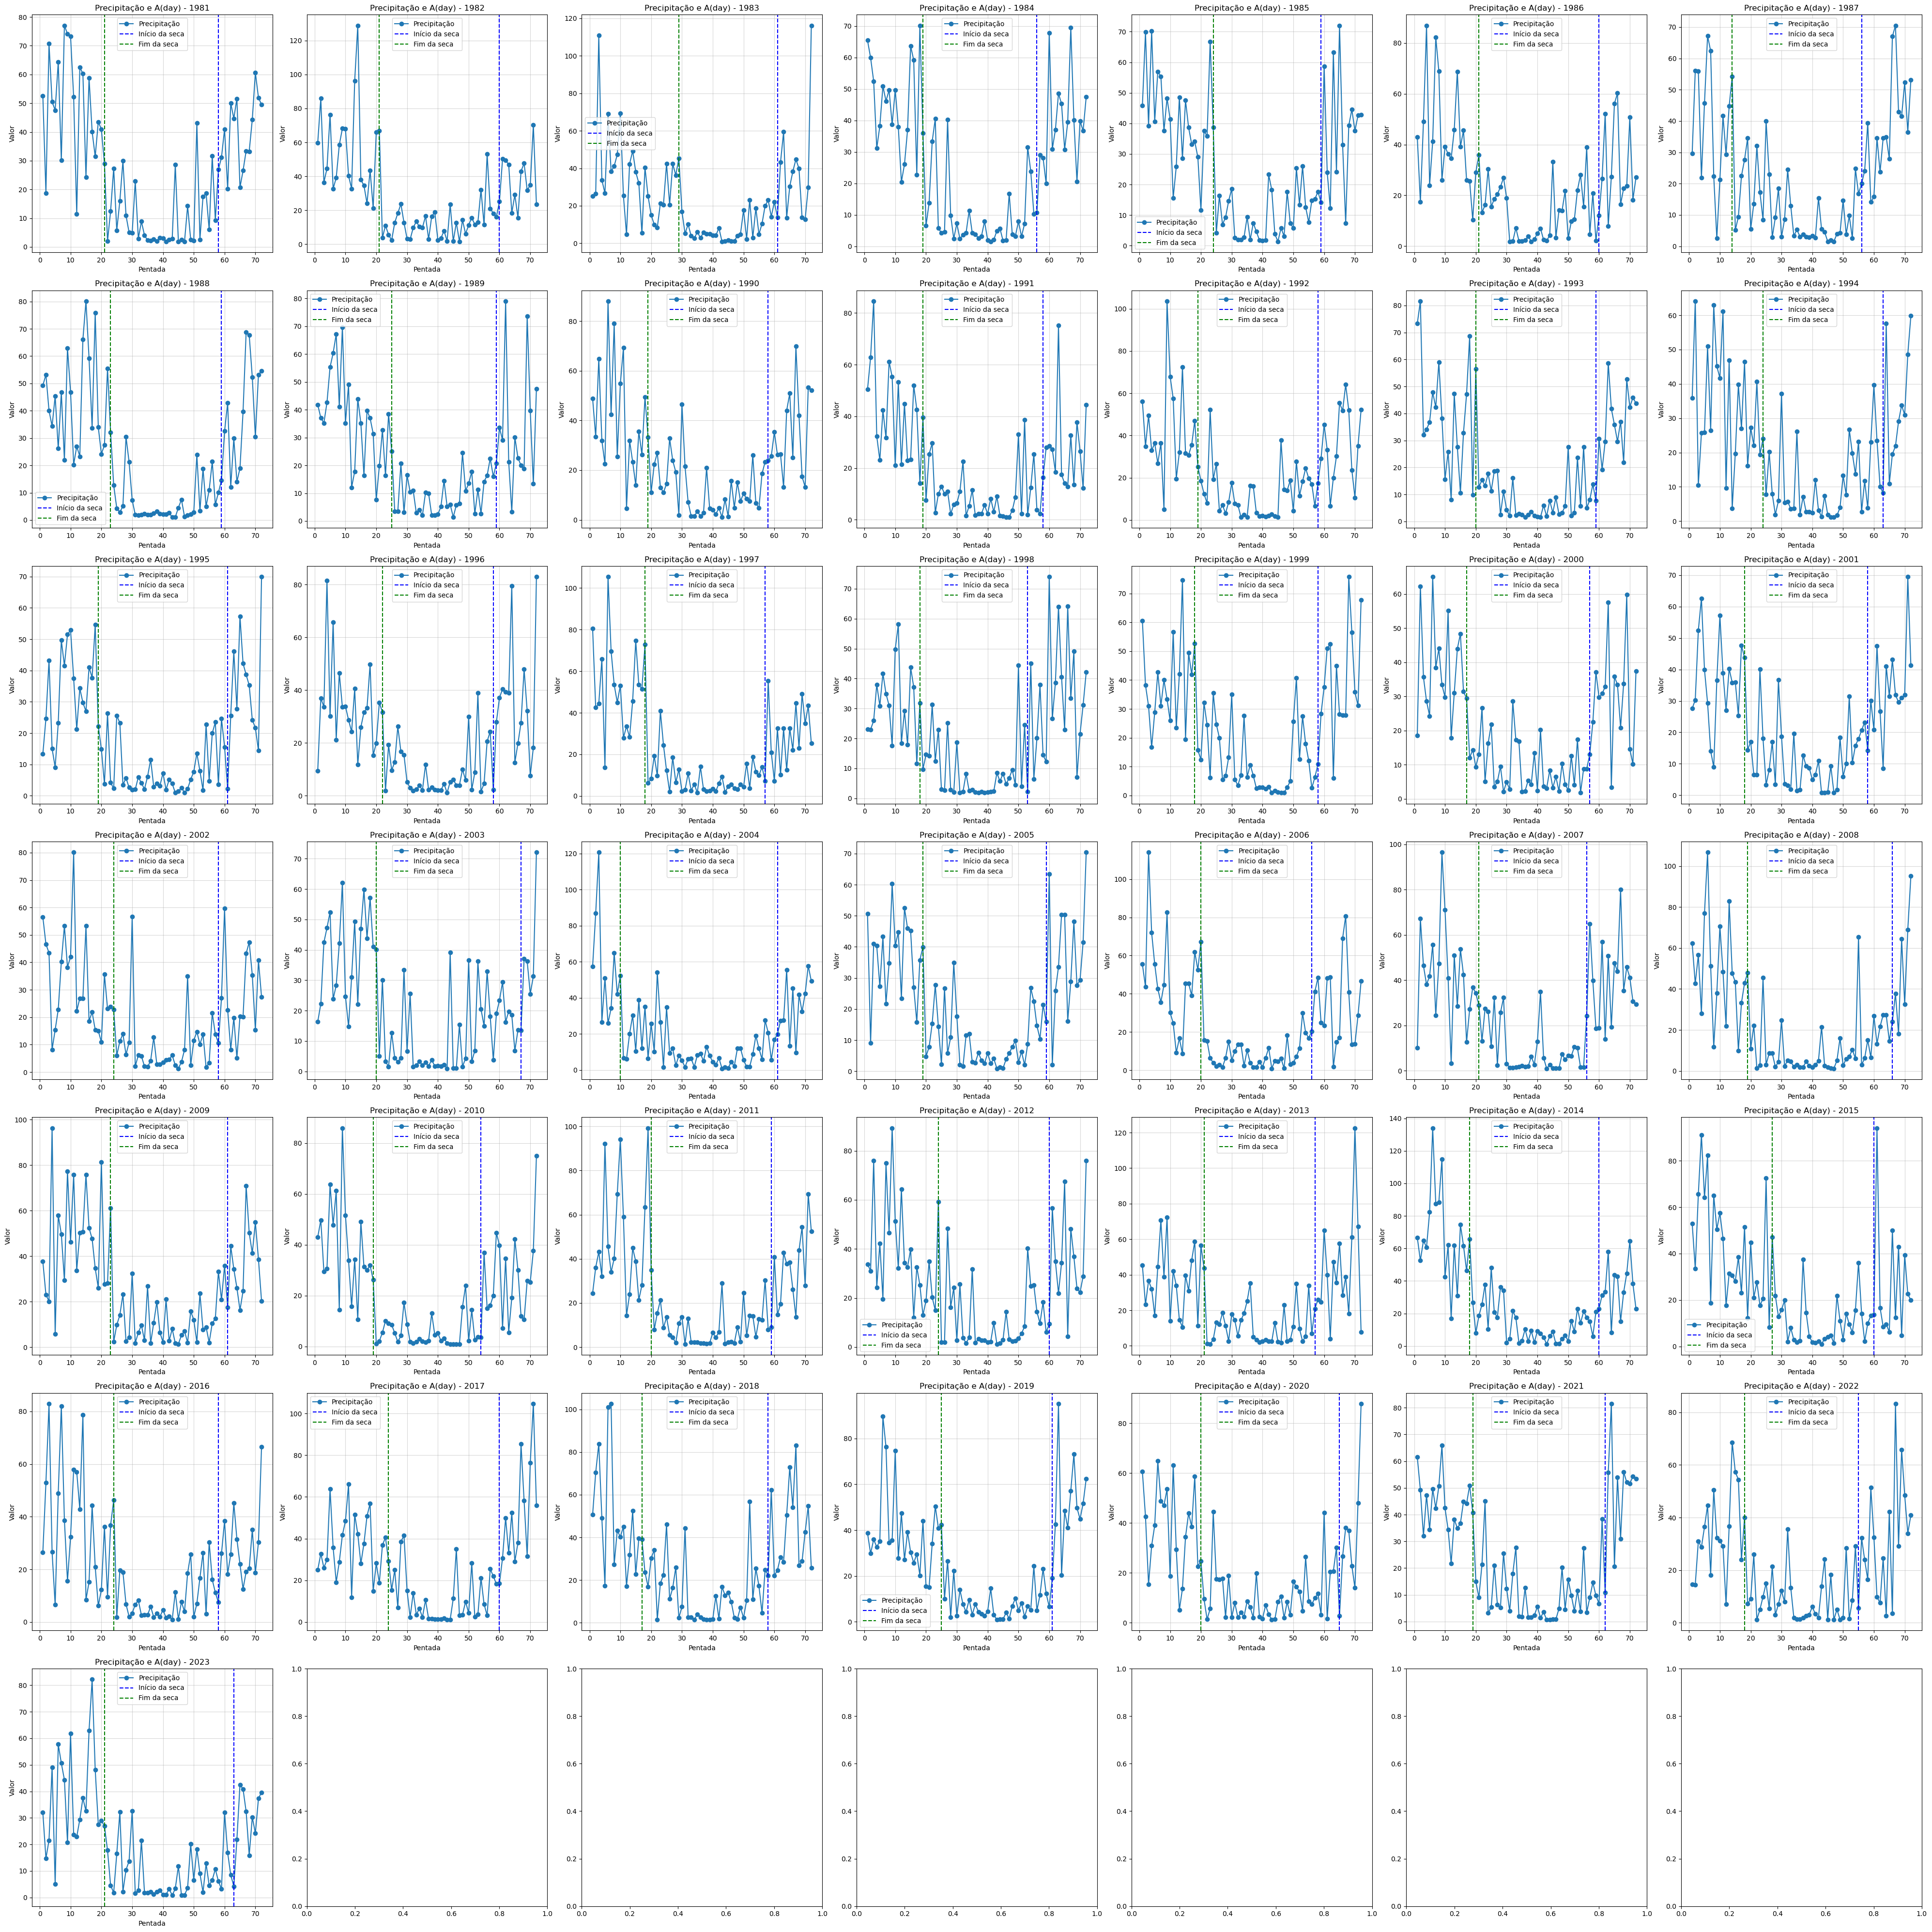

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   58                21           -37
1   1982                   60                21           -39
2   1983                   61                29           -32
3   1984                   56                19           -37
4   1985                   59                24           -35
5   1986                   60                21           -39
6   1987                   56                14           -42
7   1988                   59                23           -36
8   1989                   59                25           -34
9   1990                   58                19           -39
10  1991                   58                19           -39
11  1992                   58                19           -39
12  1993                   59                20           -39
13  1994                   63                24           -39
14  1995                   61                19           -42
15  1996

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/Amazonia_pentada_areaDematada3_precipitacao.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 2024):  # Ajustado para incluir 2023
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        inicio_seca = year_data[year_data["A_day"] == year_data["A_day"].min()]["Pentada"].values[0]
        fim_seca = year_data[year_data["A_day"] == year_data["A_day"].max()]["Pentada"].values[0]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(40, 40))  # Ajustado para 7x7 para 49 subgráficos
axes = axes.flatten()

for i, year in enumerate(range(1981, 2024)):  # Ajustado para 2023
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o')

    # Verificar se a coluna A_day existe antes de plotar
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"A coluna A_day não foi criada - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="blue", linestyle="--", label="Início da seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação e A(day) - {year}")
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)


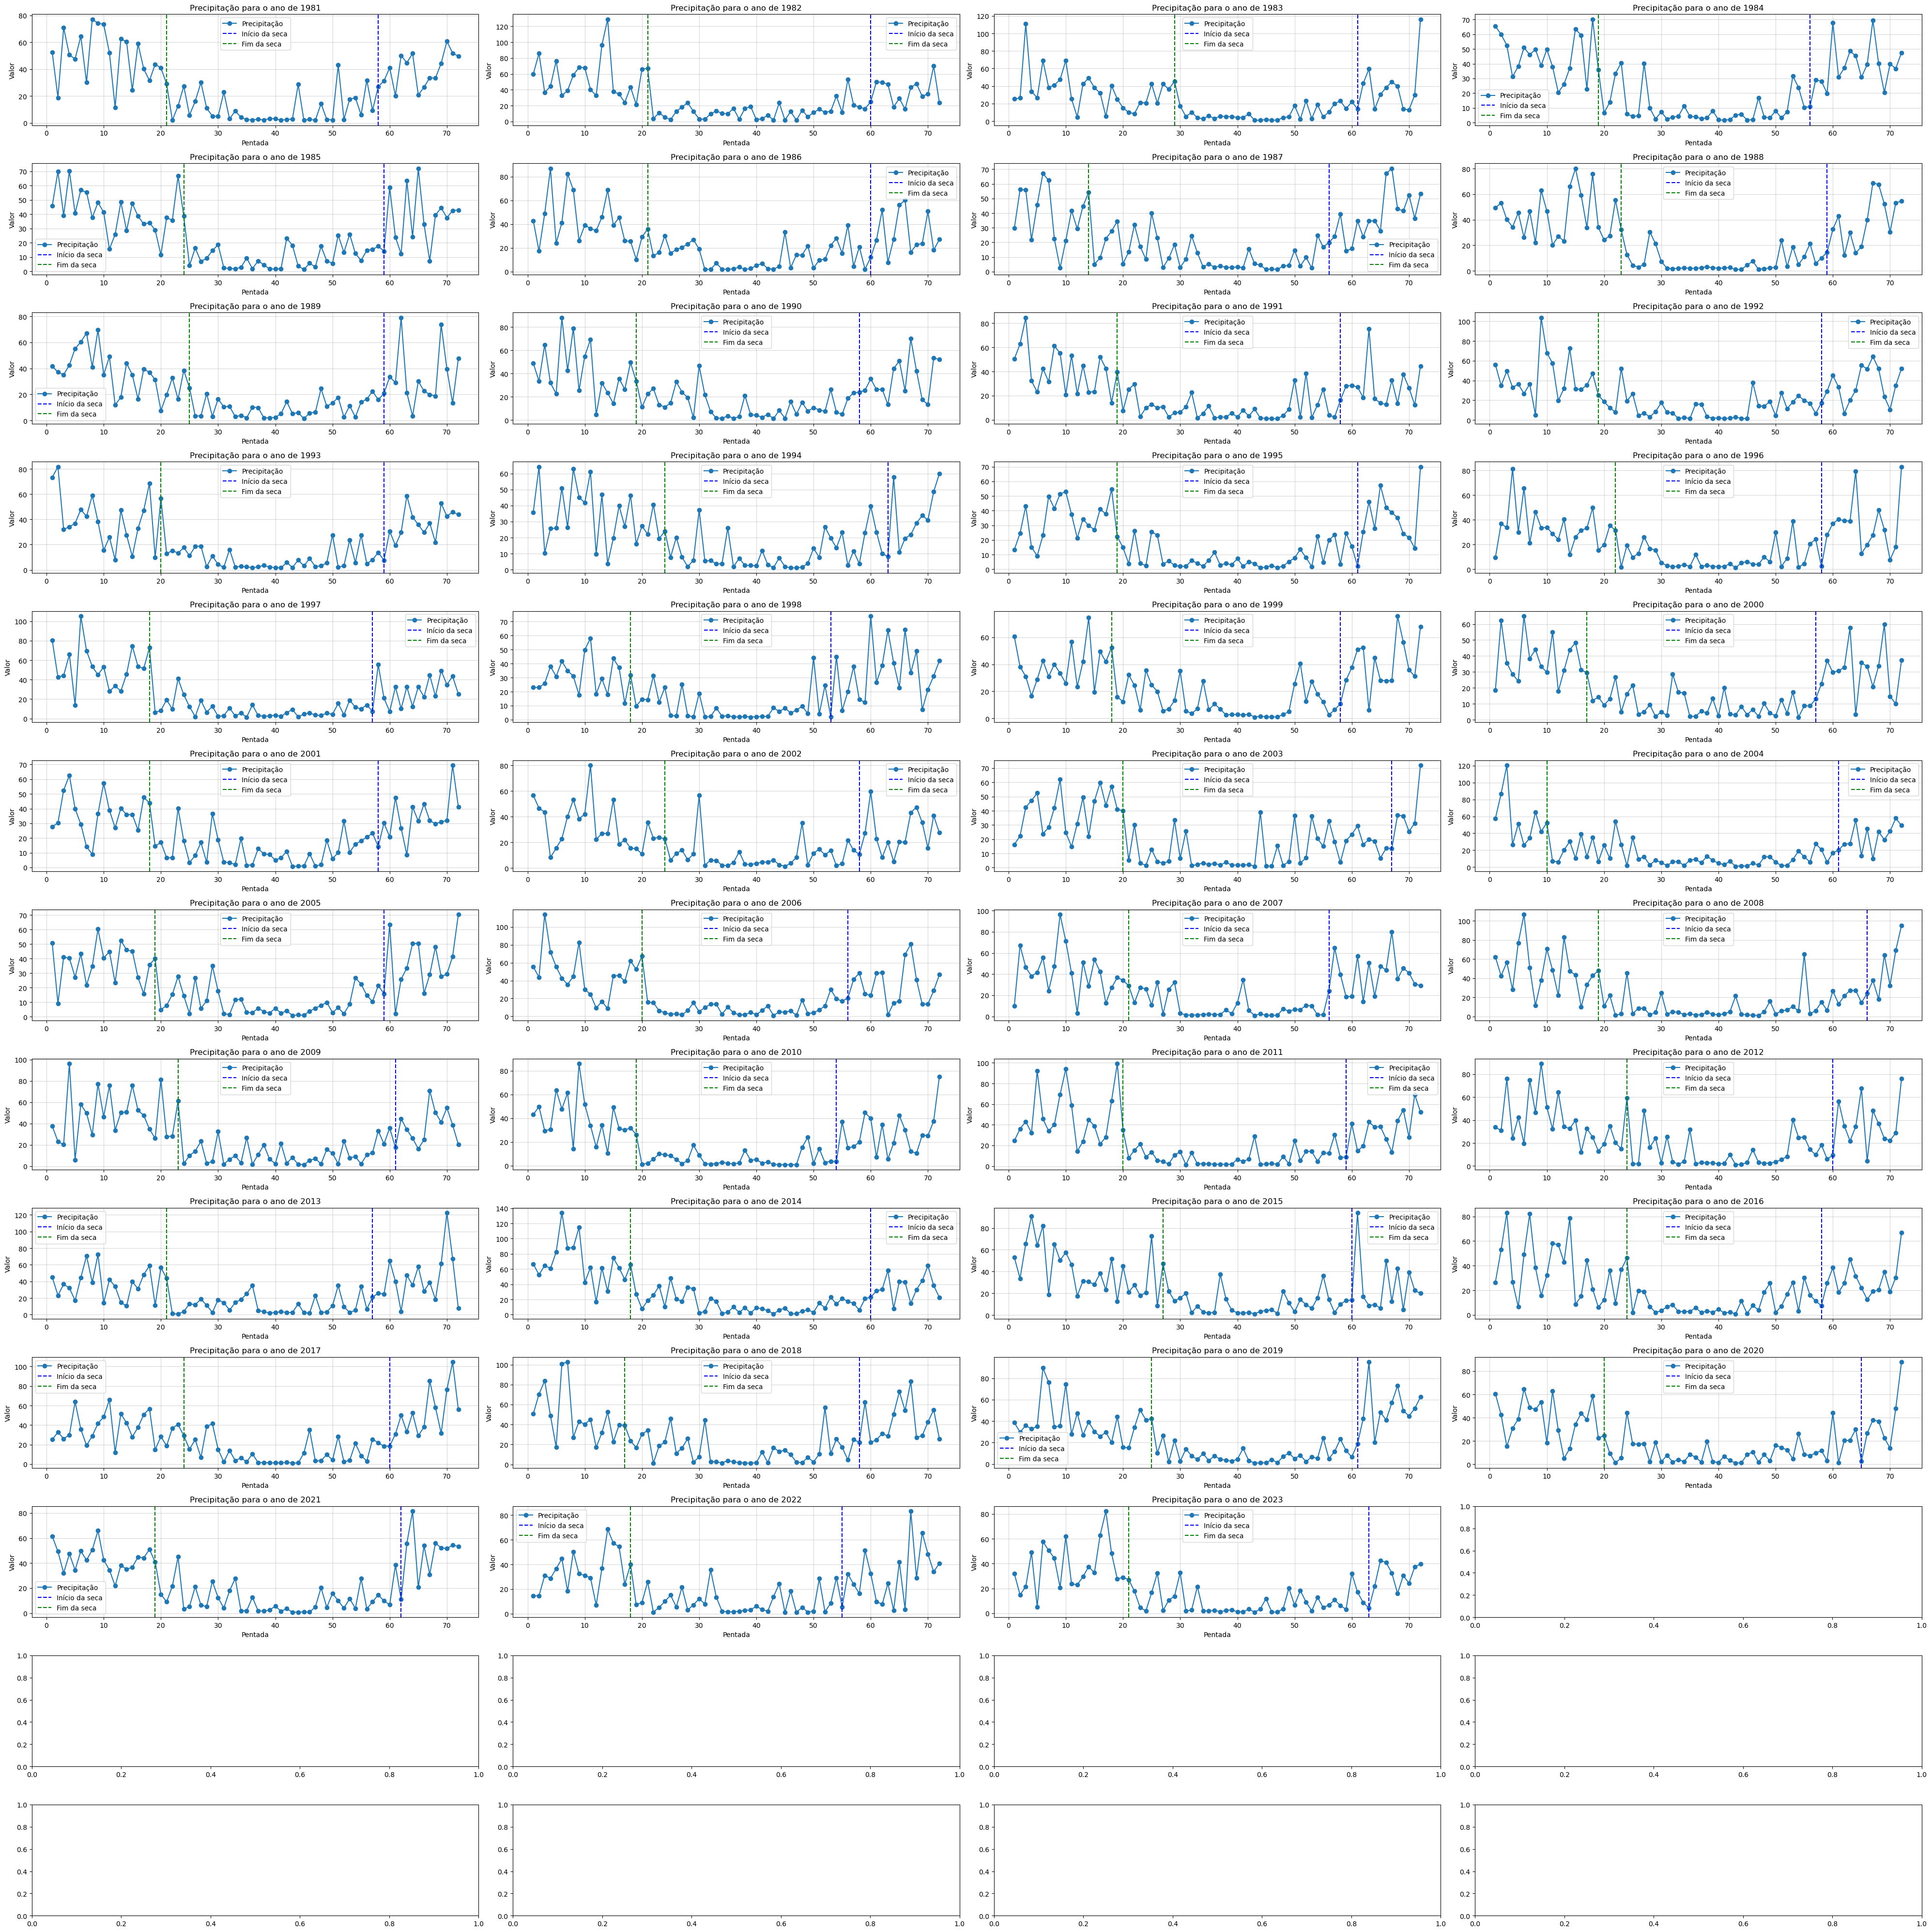

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   58                21           -37
1   1982                   60                21           -39
2   1983                   61                29           -32
3   1984                   56                19           -37
4   1985                   59                24           -35
5   1986                   60                21           -39
6   1987                   56                14           -42
7   1988                   59                23           -36
8   1989                   59                25           -34
9   1990                   58                19           -39
10  1991                   58                19           -39
11  1992                   58                19           -39
12  1993                   59                20           -39
13  1994                   63                24           -39
14  1995                   61                19           -42
15  1996

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/Amazonia_pentada_areaDematada3_precipitacao.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 2024):  # Ajustado para incluir 2023
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        inicio_seca = year_data[year_data["A_day"] == year_data["A_day"].min()]["Pentada"].values[0]
        fim_seca = year_data[year_data["A_day"] == year_data["A_day"].max()]["Pentada"].values[0]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(40, 40))  # Ajustado para 7x7 para 49 subgráficos
axes = axes.flatten()

for i, year in enumerate(range(1981, 2024)):  # Ajustado para 2023
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o')

    # Verificar se a coluna A_day existe antes de plotar
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"A coluna A_day não foi criada - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="blue", linestyle="--", label="Início da seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação para o ano de {year}")
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)